In [1]:
%matplotlib inline
import pandas
import os
import random
from PIL import Image
from matplotlib import pyplot as plt
import numpy as np
from IPython import display
import time
import shutil
import matplotlib_inline.backend_inline

In [2]:
matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

In [3]:
path=os.path.join(os.getcwd(),"dataset")

In [4]:
path

'c:\\Users\\Ken\\OneDrive - connect.hku.hk\\hku notes\\Year3\\research\\dataset'

## Spliting Data

In [6]:
def splitData( path,train_r=0.7,test_r=0.2,val_r=0.1 ):
# rename those files with JPG extension
    path=os.path.join(os.getcwd(),"dataset")
    f=os.listdir(path)
    # f.remove(".ipynb_checkpoints")
    # f.remove(".ipynb_checkpoints.jpg")
    for fname in f:
        if ".ipy" in fname:
            print(fname)
        pre , ext = os.path.splitext(fname)
        if ext != ".jpg":
            os.rename(os.path.join(path , fname) , os.path.join(path,pre) + ".jpg")
# shuffle dataset and get train,test,val dataset     
    shuffle=os.listdir(path)
    # shuffle.remove(".ipynb_checkpoints")
    # shuffle.remove(".ipynb_checkpoints.jpg")
    random.shuffle(shuffle)
    l=len(shuffle)
    train=shuffle[:int(l * train_r)]
    test=shuffle[len(train): int(l * (train_r + test_r))]
    val=shuffle[(len(train) + len(test)):]
    print("train: " , len(train) , "ratio: " , len(train)/l)
    print("test: " , len(test) , "ratio: " , len(test)/l)
    print("val: " , len(val) , "ratio: " , len(val)/l)
    return train,test,val

In [7]:
def getDataset(train,test,val):
#  create 4 dataframes(train , test , val , total) for data analysis
    total=pandas.read_csv(os.path.join(os.getcwd() ,  "info_images.txt") , sep="\t")
    for fname in train:
        total.loc[total["FileName"]==fname, "D_type"]="train"
    for fname in test:
        total.loc[total["FileName"]==fname, "D_type"]="test"
    for fname in val:
        total.loc[total["FileName"]==fname, "D_type"]="val"
    oneHot=pandas.get_dummies(total["D_type"] , prefix="Type")
    trainDF=total.loc[oneHot["Type_train"] != 0]
    testDF=total.loc[oneHot["Type_test"] != 0]
    valDF=total.loc[oneHot["Type_val"] != 0]
    # print(trainDF , testDF , valDF)
    return trainDF , testDF , valDF , total

In [10]:
def dupFiles (SrCpath,train,test,val):
    DesTpath=os.path.join(os.getcwd(),"data")
    os.makedirs(DesTpath, exist_ok=True)
    d_dict={"train":[os.path.join(DesTpath , "train") , train], "test":[os.path.join(DesTpath , "test") , test], "val":[os.path.join(DesTpath , "val") , val]}
    for _,d in d_dict.items():
        print(_)
        p=d[0]
        if os.path.exists(p) and os.path.isdir(p):
            shutil.rmtree(p)
        os.makedirs(p)
        Flist=d[1]
        for fname in Flist:
            # print(fname)
            shutil.copy(os.path.join(SrCpath , fname), p)
    

In [9]:
train,test,val = splitData(path)
trainDF,testDF,valDF,total = getDataset(train,test,val)

train:  2121 ratio:  0.7
test:  605 ratio:  0.19966996699669967
val:  304 ratio:  0.10033003300330033


In [15]:
dupFiles (path , train , test , val)

train
test
val


In [10]:
trainDF.to_csv("tables/trainDF.csv")
testDF.to_csv("tables/testDF.csv")
valDF.to_csv("tables/valDF.csv")

## Statistical Inference

In [2]:
trainDF=pandas.read_csv("tables/trainDF.csv")
train=trainDF["FileName"]
testDF=pandas.read_csv("tables/testDF.csv")
test=testDF["FileName"]
valDF=pandas.read_csv("tables/valDF.csv")
val=valDF["FileName"]
total=pandas.read_csv(os.path.join(os.getcwd() ,  "tables/info_images.txt") , sep="\t")


In [11]:
[c for c in total.columns]

['FileName',
 'DateTimeOriginal',
 'GPSLatitude',
 'GPSLongitude',
 'picture_id',
 'nb_judgments',
 'mean_elo_rating',
 'st_elo_rating',
 'elo_reduced',
 'D_type']

In [12]:
total.describe()[["mean_elo_rating","st_elo_rating","elo_reduced"]]

,mean_elo_rating,st_elo_rating,elo_reduced
count,3030.000000,3030.000000,3.030000e+03
mean,1000.000000,64.206672,-1.407015e-17
std,198.078446,16.888118,1.000000e+00
min,456.916667,13.784873,-2.741759e+00
25%,858.125000,52.258463,-7.162566e-01
50%,1003.083333,63.436917,1.556622e-02
75%,1147.083333,75.525319,7.425509e-01
max,1534.833333,127.706695,2.700109e+00


In [9]:
all=pandas.read_csv("info_images.csv")
all["Name"]=all["Name"].apply(lambda x :x.lower())
ts=pandas.read_csv("trueskill_10.csv")
merge=pandas.merge(all,ts,on="Name")
merge.drop("Unnamed: 0",inplace=True,axis=1)
merge
# merge.to_csv("elo_trueskil_merged.csv")

In [11]:
for i in range(10):
    print(f"Correlation between elo and trueskill_{i}: " , merge["elo_reduced"].corr(merge[f"rank_{i}"]))

Correlation between elo and trueskill_0:  -0.9542863555036986
Correlation between elo and trueskill_1:  -0.9535541916683699
Correlation between elo and trueskill_2:  -0.9535745047532944
Correlation between elo and trueskill_3:  -0.9547691976126682
Correlation between elo and trueskill_4:  -0.9538206794397665
Correlation between elo and trueskill_5:  -0.9533625142628599
Correlation between elo and trueskill_6:  -0.9536898755929382
Correlation between elo and trueskill_7:  -0.9541209286526514
Correlation between elo and trueskill_8:  -0.9553100339249129
Correlation between elo and trueskill_9:  -0.9545887430746783


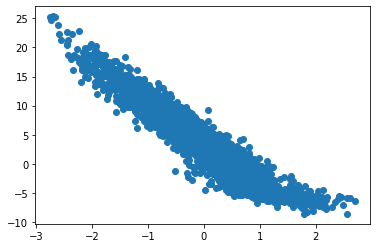

In [29]:
plt.scatter(merge["elo_reduced"],merge["rank_1"])

### Select images by condition and analyze separately

In [31]:
# Select images by condition and analyze
#
# selected=total.loc[(total["elo_reduced"]>=0.0) & (total["elo_reduced"]<=1.0)]
selected = total.sort_values(by = "elo_reduced" ,  ascending = True)
Flist=list(selected["FileName"])
folderName="sort_by_elo_asc"
os.makedirs(os.path.join(os.getcwd(),folderName),exist_ok=True)
count=0
for fname in Flist:
    row=selected.loc[selected["FileName"]==fname].index.item()
    # print(selected.iloc[i]["elo_reduced"])
    shutil.copy(os.path.join(path , fname ), os.path.join(os.getcwd(),folderName,f"{count}_{row}.jpg"))
    count+=1
# print(Flist[:10])

In [4]:
# f=[f for f in os.listdir("overlay") if not f.startswith(".")]
# for fname in f:
#     row=total.loc[total["FileName"]==fname].index.item()
#     os.rename("overlay/" + fname, f"{row}.jpg")

In [28]:
selected = total.sort_values(by = "elo_reduced" ,  ascending = True)
selected

,FileName,DateTimeOriginal,GPSLatitude,GPSLongitude,picture_id,nb_judgments,mean_elo_rating,st_elo_rating,elo_reduced
583,Team 12 (Whampoa)_Tam Chin Hang (Nigel)_24.jpg,2020:11:06 11:38:31,22.300083,114.187347,3641,30,456.916667,17.966931,-2.741759
586,Team 12 (Whampoa)_Tam Chin Hang (Nigel)_29.jpg,2020:11:06 11:41:21,22.299272,114.185517,3661,35,459.333333,16.691497,-2.729558
2809,Team 8 (Central)_Yiu Sze Wan (Sharon)_5.jpg,2020:11:02 14:46:50,22.285442,114.162339,17368,35,465.333333,33.312114,-2.699267
2808,Team 8 (Central)_Yiu Sze Wan (Sharon)_49.jpg,2020:11:02 15:05:43,22.283900,114.161444,17367,33,473.666667,18.421003,-2.657196
2024,Team 4 (North Point)_Kwok Shun Wang (Clement)_...,2020:11:08 18:12:27,22.280861,114.189280,12431,33,483.500000,33.211444,-2.607553
...,...,...,...,...,...,...,...,...,...
721,Team 13 (Sai Ying Pun)_Siu Ka Sing (Benny)_123...,2020:11:10 14:03:14,22.287890,114.139442,4509,32,1493.500000,29.834391,2.491437
2165,Team 5 (Tai Koo)_Chau Chun Yiu (Daniel)_38.jpg,2020:11:06 10:43:55,22.276158,114.211383,13277,27,1506.083333,26.207072,2.554964
1950,Team 4 (North Point)_Kong Ling Chuen (Zoe)_151...,2020:11:07 09:55:36,22.291319,114.198014,11959,42,1508.916667,36.629492,2.569268
1711,Team 3 (Sheung Wan)_Chan Man Tik (Jacob)_121.jpg,2020:11:06 17:18:38,22.278186,114.156844,10475,43,1516.166667,61.451878,2.605870


In [33]:
ts_rank_only=pandas.read_csv("trueskill_rank_only.csv")
ts_rank_only["rank"]=ts_rank_only.iloc[:, 1:10].mean(axis=1)
ts_rank_only["Name"]=ts_rank_only["Name"].apply(lambda x : x.replace("&","_"))

In [35]:
ts_rank_only.to_csv("trueskill.csv",index=False)

In [20]:
# select part of the columns, round up elo and rename column
# train_ag=trainDF[["FileName"]]
# train_ag["rank"]=0
# test_ag=testDF[["FileName"]]
# test_ag["rank"]=0
# val_ag=valDF[["FileName"]]
# val_ag["rank"]=0
# ts=pandas.read_csv("trueskill.csv")
# for fname in train:
#     if len(ts.loc[ts["Name"]==fname.lower()])!=1:
#         print(fname.lower())
#     train_ag.loc[train_ag["FileName"]==fname,"rank"]=ts.loc[ts["Name"]==fname.lower(),"rank"].item()
# for fname in test:
#     test_ag.loc[test_ag["FileName"]==fname,"rank"]=ts.loc[ts["Name"]==fname.lower(),"rank"].item()
# for fname in val:
#     val_ag.loc[val_ag["FileName"]==fname,"rank"]=ts.loc[ts["Name"]==fname.lower(),"rank"].item()
# df_ls=[train_ag,test_ag,val_ag]
# for df in df_ls:
#     df.rename(columns={"FileName":"image"},inplace=True)
#     df["rank"]= np.around(df["rank"],decimals=2)
# # train_ag=pandas.concat([train_ag,test_ag])
# train_ag.to_csv("train_ag2.csv")
# test_ag.to_csv("test_ag2.csv")
# val_ag.to_csv("val_ag2.csv")




C:\Users\Ken\AppData\Local\Temp/ipykernel_14316/3514887022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_ag["rank"]=0
C:\Users\Ken\AppData\Local\Temp/ipykernel_14316/3514887022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_ag["rank"]=0
C:\Users\Ken\AppData\Local\Temp/ipykernel_14316/3514887022.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h